In [1]:
! conda install -y -c r r-base='3.3.2' rpy2

Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /Users/piero/anaconda:
#



In [3]:
%matplotlib inline
%load_ext rpy2.ipython

In [4]:
%%R
library(reshape2)


Error in library(reshape2) : there is no package called ‘reshape2’


/Users/piero/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in library(reshape2) : there is no package called ‘reshape2’

  warnings.warn(x, RRuntimeWarning)


In [5]:
%%R
library(ggplot)


Error in library(ggplot) : there is no package called ‘ggplot’


/Users/piero/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in library(ggplot) : there is no package called ‘ggplot’

  warnings.warn(x, RRuntimeWarning)


# Basic dataframe exploration

The original dataset:

In [6]:
pokemon = pd.read_csv('Pokemon.csv')

df = pd.DataFrame(pokemon)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


We check for double types

In [7]:
df['Double type'] = df['Type 2'].notnull()
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Double type
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,False


The combination of Type 1 and Type 2 are put in a seperate table

In [8]:
df['Combination type'] = df['Type 1'] + '/' + df['Type 2']
df['Combination type'].fillna(df['Type 1'], inplace=True)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Double type,Combination type
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,True,Grass/Poison
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,True,Grass/Poison
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,True,Grass/Poison
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,True,Grass/Poison
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,False,Fire


The number of different types and a top 10 of the types that occur most in the dataset

In [9]:
df['Combination type'].value_counts().head(10)

Normal           61
Water            59
Psychic          38
Grass            33
Fire             28
Electric         27
Normal/Flying    24
Fighting         20
Bug              17
Grass/Poison     15
Name: Combination type, dtype: int64

In [10]:
df['Combination type'].value_counts().count()

154

The number of single types (True) and double types (False)

In [11]:
df['Type 2'].isnull().value_counts()

False    414
True     386
Name: Type 2, dtype: int64

We sorted the data by Generation. You can see that the first generation has the most pokemon but the most generations have around 160 pokemon.

In [12]:
df_stats = df.groupby('Generation').mean().iloc[:,1:8]
df_stats

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Generation,,,,,,,
1,426.813253,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337
2,418.283019,71.207547,72.028302,73.386792,65.943396,73.905660,61.811321
3,436.225000,66.543750,81.625000,74.100000,75.806250,71.225000,66.925000
4,459.016529,73.082645,82.867769,78.132231,76.404959,77.190083,71.338843
5,434.987879,71.787879,82.066667,72.327273,71.987879,68.739394,68.078788
6,436.378049,68.268293,75.804878,76.682927,74.292683,74.890244,66.439024


In [13]:
df_nr = df.groupby('Generation').count()['#']
df_nr

Generation
1    166
2    106
3    160
4    121
5    165
6     82
Name: #, dtype: int64

# Correlation check

We searched for correlation between statistics.There is no real good correlation between one of those values. You can only see that the total correlates with everything the best. Another higher correlation is between defense and speed defense as well as speed attack and attack.

In [14]:
df_corr = df.iloc[:,2:-4]

In [15]:
correlation = df_corr.corr()
correlation

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


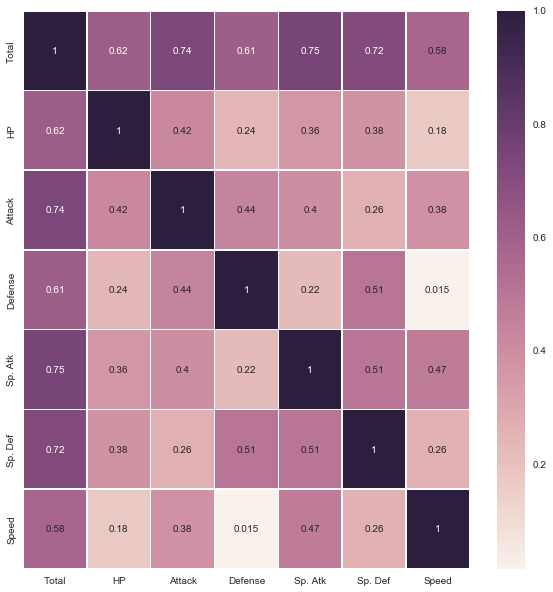

In [16]:
fig, ax = plt.subplots(figsize=(10,10))   

sns.heatmap(correlation, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values,
           annot=True, linewidths=.5, ax=ax)

# Some figures

Below we visualize the boxplots by relevant feature

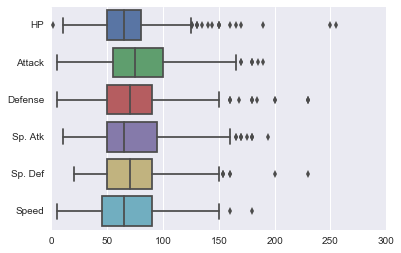

In [17]:
sns.boxplot(data=df.drop(['#', 'Total', 'Generation', 'Legendary', 'Double type'], 1), orient='h');

In the violin plot below it becomes apparent that the legendary pokemon appear to have a structurally higher HP than normal pokemon. Additionally the spread is lower. This is evident since the legendary pokemon are usually of a high level and therefore are less bound to have major differences in feature scores.

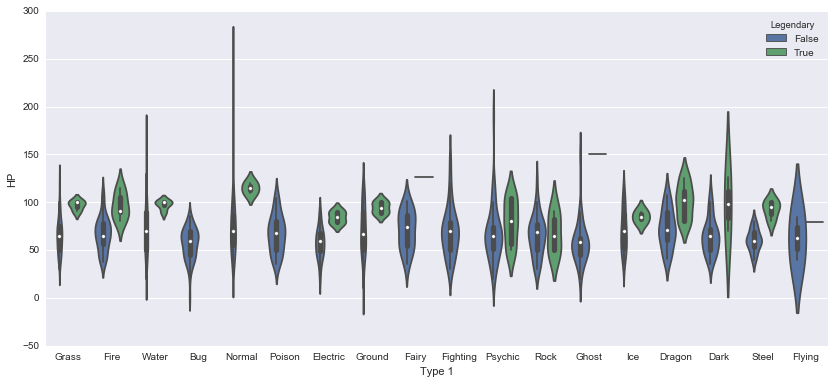

In [18]:
type1 = pokemon['Type 1'].value_counts()
type2 = pokemon['Type 2'].value_counts()
types = pd.concat([type1,type2], axis=1)
plt.figure(figsize=(14, 6))
plt.ylabel('HP')
#boxplot of swarmplot
sns.violinplot(data=pokemon, x='Type 1', y='HP', hue='Legendary');

The difference between legendary and normal pokemon becomes more clear when looking at the total score. This aggregate feature explicitly highlights that legendary have structurally higher aggregate scores in comparison to normal pokemon, which is what is to be expected.

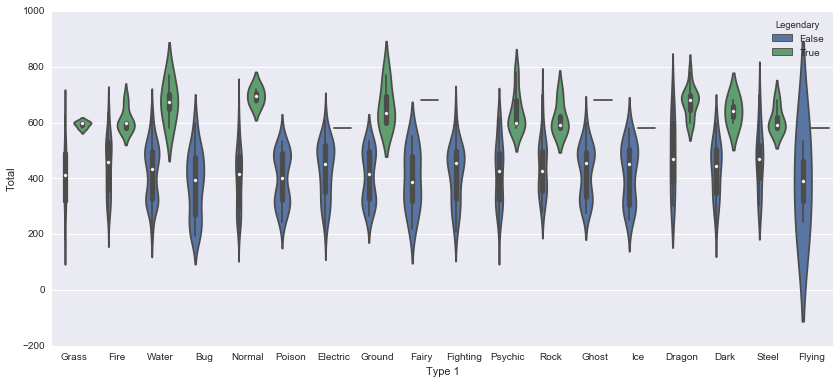

In [19]:
plt.figure(figsize=(14, 6))
#boxplot of swarmplot of violinplot
sns.violinplot(data=pokemon, x='Type 1', y='Total', hue='Legendary');

Next a pie chart is given, presenting the distribution of main pokemon types (Type 1). You can see  that most pokemon are water or normal pokemon.

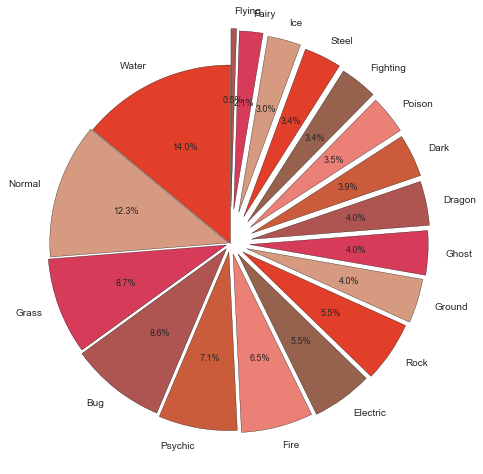

In [20]:
plt.figure(figsize=(8, 8))
# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
plt.rcParams['font.size'] = 9.0
plt.pie(x=type1,
        labels=type1.index,
       # with no shadows
        shadow=False,
        # with colors
        colors=colors,
        # with one slide exploded out
        explode=(np.arange(len(type1.index))) * 0.012,
        # with the start angle at 90%
        startangle=90,
        # with the percent listed as a fraction
        autopct='%1.1f%%');

# Introducing a scoring algorithm

Next we want to construct some kind of measurement to score each pokemon. We want to give an indication of the 'strength' of a pokemon, based on a comparison of this pokemon to all the other pokemon in the dataset. To get this score we've constructed an algorithm that runs through the whole dataset for each pokemon and will be comparison based. We basicly try to represent a battle between two pokemon each time a comparison is made. Here we assume optimal behaviour of the pokemon in the sense that the dominant pokemon type (that is, which can do the most damage to the other pokemon) is chosen and a score will be assigned based on the defense and attack tables below.

The scoring is as follows:<br>
Weak to/Super effective against = 2<br>
Resist/Not very effective against = 0.5<br>
Immune to/Does no damage to = 0<br>
Any other type combination = 1<br>

For instance, if a fire type pokemon fights a rock/grass pokemon, the rock type will be dominant over the grass type since fire is weak against rock, which gives a higher score than when compared to grass.

In the end, for each pokemon, all the comparison based values will be summed to give an attack index and a defense index. Note that the score is based on the combination type, so pokemon with the same type initialy have the same score.

To calculate the strength index we substract the defense index from the attack index, we add 200 to make all values positive and finally multiply that number by the 'Total' feature score from the original dataset.

All the steps that are performed are written down as strings, since the computation of these scores can take up a lot of time. The result was exported to an additional csv file named 'Pokemon new dataset', which is used from now on in stead of the original dataset.

In [21]:
defensefile = pd.read_csv('Pokemon type chart defense.csv', delimiter=';')
defensetypes = pd.DataFrame(defensefile)
defensetypes = defensetypes.set_index('Type')
defensetypes

,Weak to (2x),Resist (1/2x),Immune to
Type,,,
Normal,Fighting,None,Ghost
Fire,"Water, Ground, Rock","Fire, Grass, Ice, Bug, Steel, Fairy",None
Water,"Electric, Grass","Fire, Water, Ice, Steel",None
Electric,Ground,"Electric, Flying, Steel",None
Grass,"Fire, Ice, Poison, Flying, Bug","Water, Electric, Grass, Ground",None
Ice,"Fire, Fighting, Rock, Steel",Ice,None
Fighting,"Flying, Psychic, Fairy","Bug, Rock, Dark",None
Poison,"Ground, Psychic","Grass, Fighting, Poison, Bug, Fairy",None
Ground,"Water, Grass, Ice","Poison, Rock",Electric


In [22]:
attackfile = pd.read_csv('Pokemon type chart attack.csv', delimiter=';')
attacktypes = pd.DataFrame(attackfile)
attacktypes = attacktypes.dropna().set_index('Type')
attacktypes

,Super-effective against (2x),Not very effective against (1/2x),Does no damage to
Type,,,
Normal,None,"Rock, Steel",Ghost
Fire,"Grass, Ice, Bug, Steel","Fire, Water, Rock, Dragon",None
Water,"Fire, Ground, Rock","Water, Grass, Dragon",None
Electric,"Water, Flying","Electric, Grass, Dragon",Ground
Grass,"Water, Ground, Rock","Fire, Grass, Poison, Flying, Bug, Dragon, Steel",None
Ice,"Grass, Ground, Flying, Dragon","Fire, Water, Ice, Steel",None
Fighting,"Normal, Ice, Rock, Dark, Steel","Poison, Flying, Psychic, Bug, Fairy",Ghost
Poison,"Grass, Fairy","Poison, Ground, Rock, Ghost",Steel
Ground,"Fire, Electric, Poison, Rock, Steel","Grass, Bug",Flying


In [23]:
# Columns to be filled with some kind of measurement

In [24]:
#df['Attack index'] = 0
#df['Defense index'] = 0
#df['Strength index'] = 0

In [25]:
# Calculating the measurements. Finished file is imported in 'Pokemon new dataset.ipynb'

In [26]:
'''
attackcache = {}
for i in range(len(df)):
    if df.iloc[i,14] in attackcache:
        df.iloc[i,16] = attackcache[df.iloc[i,14]]
        continue
    checklist =  len(df)*[0]
    for j in range(2,4):
        if type(df.iloc[i,j]) != float:
            for g in range(len(df)):
                if checklist[g] < 2:
                    count = 0
                    for h,item in enumerate(df.iloc[g,14].split(sep='/')):
                        if type(item) != float:
                            if h == 1:
                                    if count == 1:
                                        if item in attacktypes.loc[df.iloc[i,j],'Super-effective against (2x)']:
                                            count += 1
                                    elif count == 0.5:
                                        if item in attacktypes.loc[df.iloc[i,j],'Super-effective against (2x)']:
                                            count += 1.5
                                        elif item in attacktypes.loc[df.iloc[i,j],'Not very effective against (1/2x)']:
                                            break
                                        elif item not in attacktypes.loc[df.iloc[i,j],'Does no damage to']:
                                            count += 0.5
                                    else:
                                        if item in attacktypes.loc[df.iloc[i,j],'Super-effective against (2x)']:
                                            count += 2
                                        elif item in attacktypes.loc[df.iloc[i,j],'Not very effective against (1/2x)']:
                                            count += 0.5
                                        elif item not in attacktypes.loc[df.iloc[i,j],'Does no damage to']:
                                            count += 1
                            else:
                                    if item in attacktypes.loc[df.iloc[i,j],'Super-effective against (2x)']:
                                        count += 2
                                        break
                                    elif item in attacktypes.loc[df.iloc[i,j],'Not very effective against (1/2x)']:
                                        count += 0.5
                                    elif item not in attacktypes.loc[df.iloc[i,j],'Does no damage to']:
                                        count += 1
                    if count > checklist[g]:
                        checklist[g] = count
            
    df.iloc[i,16] = sum(checklist)
    attackcache[df.iloc[i,14]] = sum(checklist)
'''

"\nattackcache = {}\nfor i in range(len(df)):\n    if df.iloc[i,14] in attackcache:\n        df.iloc[i,16] = attackcache[df.iloc[i,14]]\n        continue\n    checklist =  len(df)*[0]\n    for j in range(2,4):\n        if type(df.iloc[i,j]) != float:\n            for g in range(len(df)):\n                if checklist[g] < 2:\n                    count = 0\n                    for h,item in enumerate(df.iloc[g,14].split(sep='/')):\n                        if type(item) != float:\n                            if h == 1:\n                                    if count == 1:\n                                        if item in attacktypes.loc[df.iloc[i,j],'Super-effective against (2x)']:\n                                            count += 1\n                                    elif count == 0.5:\n                                        if item in attacktypes.loc[df.iloc[i,j],'Super-effective against (2x)']:\n                                            count += 1.5\n                          

In [27]:
'''
defensecache = {}
for i in range(len(df)):
    if df.iloc[i,14] in defensecache:
        df.iloc[i,17] = defensecache[df.iloc[i,14]]
        continue
    checklist =  len(df)*[0]
    for j in range(2,4):
        if type(df.iloc[i,j]) != float:
            for g in range(len(df)):
                if checklist[g] < 2:
                    count = 0
                    for h,item in enumerate(df.iloc[g,14].split(sep='/')):
                        if type(item) != float:
                            if h == 1:
                                    if count == 1:
                                        if item in defensetypes.loc[df.iloc[i,j],'Weak to (2x)']:
                                            count += 1
                                    elif count == 0.5:
                                        if item in defensetypes.loc[df.iloc[i,j],'Weak to (2x)']:
                                            count += 1.5
                                        elif item in defensetypes.loc[df.iloc[i,j],'Resist (1/2x)']:
                                            break
                                        elif item not in defensetypes.loc[df.iloc[i,j],'Immune to']:
                                            count += 0.5
                                    else:
                                        if item in defensetypes.loc[df.iloc[i,j],'Weak to (2x)']:
                                            count += 2
                                        elif item in defensetypes.loc[df.iloc[i,j],'Resist (1/2x)']:
                                            count += 0.5
                                        elif item not in defensetypes.loc[df.iloc[i,j],'Immune to']:
                                            count += 1
                            else:
                                    if item in defensetypes.loc[df.iloc[i,j],'Weak to (2x)']:
                                        count += 2
                                        break
                                    elif item in defensetypes.loc[df.iloc[i,j],'Resist (1/2x)']:
                                        count += 0.5
                                    elif item not in defensetypes.loc[df.iloc[i,j],'Immune to']:
                                        count += 1
                    if count > checklist[g]:
                        checklist[g] = count
            
    df.iloc[i,17] = sum(checklist)
    defensecache[df.iloc[i,14]] = sum(checklist)
'''

"\ndefensecache = {}\nfor i in range(len(df)):\n    if df.iloc[i,14] in defensecache:\n        df.iloc[i,17] = defensecache[df.iloc[i,14]]\n        continue\n    checklist =  len(df)*[0]\n    for j in range(2,4):\n        if type(df.iloc[i,j]) != float:\n            for g in range(len(df)):\n                if checklist[g] < 2:\n                    count = 0\n                    for h,item in enumerate(df.iloc[g,14].split(sep='/')):\n                        if type(item) != float:\n                            if h == 1:\n                                    if count == 1:\n                                        if item in defensetypes.loc[df.iloc[i,j],'Weak to (2x)']:\n                                            count += 1\n                                    elif count == 0.5:\n                                        if item in defensetypes.loc[df.iloc[i,j],'Weak to (2x)']:\n                                            count += 1.5\n                                        elif item in 

In [28]:
# df['Strength index'] = (df['Attack index'] - df['Defense index'] + 200)*df['Total']/100

In [29]:
# df.to_csv('Pokemon new dataset.csv', encoding='utf-8') 

In [30]:
pokemon_new = pd.read_csv('Pokemon new dataset.csv', sep=',')
new_df = pd.DataFrame(pokemon_new)

In [31]:
new_df.drop('Unnamed: 0', axis=1, inplace=True)

In [32]:
new_df.sort_values(by='Strength index', ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Double type,Combination type,cat,Attack index,Defense index,Strength index
0,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,True,Electric/Flying,33,1188.5,997.0,2270.700
1,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True,True,Electric/Flying,33,1188.5,997.0,2270.700
2,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True,True,Electric/Flying,33,1188.5,997.0,2270.700
3,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,True,Ground/Fire,81,1215.0,1135.0,2156.000
4,479,RotomHeat Rotom,Electric,Fire,520,50,65,107,105,107,86,4,False,True,Electric/Fire,32,1217.5,1019.5,2069.600
5,479,RotomFan Rotom,Electric,Flying,520,50,65,107,105,107,86,4,False,True,Electric/Flying,33,1188.5,997.0,2035.800
6,644,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,5,True,True,Dragon/Electric,22,1060.0,967.5,1989.000
7,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,True,Dragon/Flying,25,1055.5,1004.5,1957.800
8,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False,False,Steel,130,866.5,766.0,1893.150
9,243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True,False,Electric,29,965.0,845.5,1853.100


We read the new_df in R seperately since importing it lead to complications

In [33]:
%%R
new_df = read.csv('Pokemon new dataset.csv')
head(new_df)

    X  X.                     Name   Type.1 Type.2 Total  HP Attack Defense
1 157 145                   Zapdos Electric Flying   580  90     90      85
2 704 642 ThundurusIncarnate Forme Electric Flying   580  79    115      70
3 705 642   ThundurusTherian Forme Electric Flying   580  79    105      70
4 424 383    GroudonPrimal Groudon   Ground   Fire   770 100    180     160
5 532 479          RotomHeat Rotom Electric   Fire   520  50     65     107
6 535 479           RotomFan Rotom Electric Flying   520  50     65     107
  Sp..Atk Sp..Def Speed Generation Legendary Double.type Combination.type cat
1     125      90   100          1      True        True  Electric/Flying  33
2     125      80   111          5      True        True  Electric/Flying  33
3     145      80   101          5      True        True  Electric/Flying  33
4     150      90    90          3      True        True      Ground/Fire  81
5     105     107    86          4     False        True    Electric/Fire  32


Here we plotted the probability of having a certain strength-level

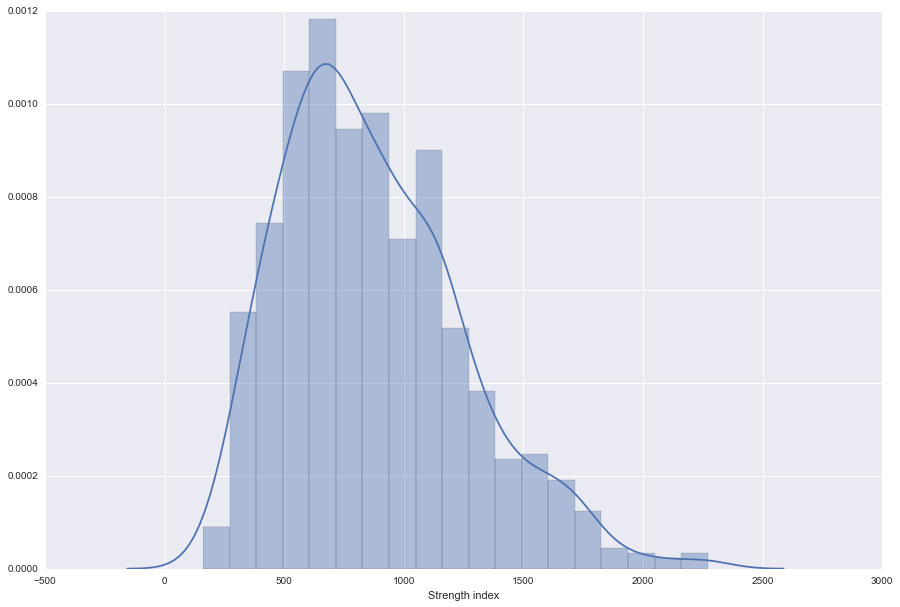

In [34]:
f, ax = plt.subplots(figsize=(15,10))
sns.distplot(new_df['Strength index'],ax=ax)

We sort the pokemon based on the mean strength value for each group, when grouped by the unique Type 1 values. Subsequently we plot the strength index probability functions in that order.

In [35]:
new_df[['Type 1', 'Strength index']].groupby('Type 1').mean().sort_values(by='Strength index').index

Index([u'Grass', u'Normal', u'Rock', u'Psychic', u'Poison', u'Bug',
       u'Fighting', u'Dark', u'Steel', u'Water', u'Fire', u'Ghost', u'Ground',
       u'Dragon', u'Fairy', u'Ice', u'Flying', u'Electric'],
      dtype='object', name=u'Type 1')

In [36]:
%%R -w 1000 -h 1000

# Ordering the data, grouped by Type 1, by mean of the strength index
new_df$Type.1 <- factor(new_df$Type.1, levels = c('Grass', 'Normal', 'Rock', 'Psychic', 'Poison', 'Bug', 'Fighting',
       'Dark', 'Steel', 'Water', 'Fire', 'Ghost', 'Ground', 'Dragon', 'Fairy',
       'Ice', 'Flying', 'Electric')) 

# Plotting it in that order
ggplot(new_df, aes(x = Strength.index)) + geom_density(alpha = 0.5) + facet_wrap(~ Type.1)


Error in withVisible({ : could not find function "ggplot"


/Users/piero/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in withVisible({ : could not find function "ggplot"

  warnings.warn(x, RRuntimeWarning)


We split the dataset by generation and for each type we count the number of times it occurs as a Type 1 and the number of types it occurs as a Type 2. We can perform this operation since the set of pokemon types is the same for Type 1 and Type 2

In [37]:
%%R -w 1000 -h 1000

dfm <- melt(new_df[,c('Generation','Type.1','Type.2')],id.vars = 1) # Dataframe melting
dfm <- dfm[!apply(dfm, 1, function(x) any(x=="")),] # Removing the empty values
dfm


Error in withVisible({ : could not find function "melt"


/Users/piero/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in withVisible({ : could not find function "melt"

  warnings.warn(x, RRuntimeWarning)


In [38]:
%%R -w 1000 -h 1500

ggplot(dfm, aes(x=factor(value), fill=factor(variable))) +
    geom_bar(position="dodge") + facet_wrap(~ Generation, ncol=1, scales='free_x') + 
    labs(fill='', x='Types')


Error in withVisible({ : could not find function "ggplot"


We are trying to fit the strenght of legendary and non legendary pokemon to a linear function to again highlight the differences between legendary and non-legendary pokemon. Again, the total score of legendary pokemon is structurally higher than the total score of non-legendary pokemon, which also explains the difference in slope between the two lines. In addition, most of the pokemon appearing in the top ten of the strength index are legendary pokemon.

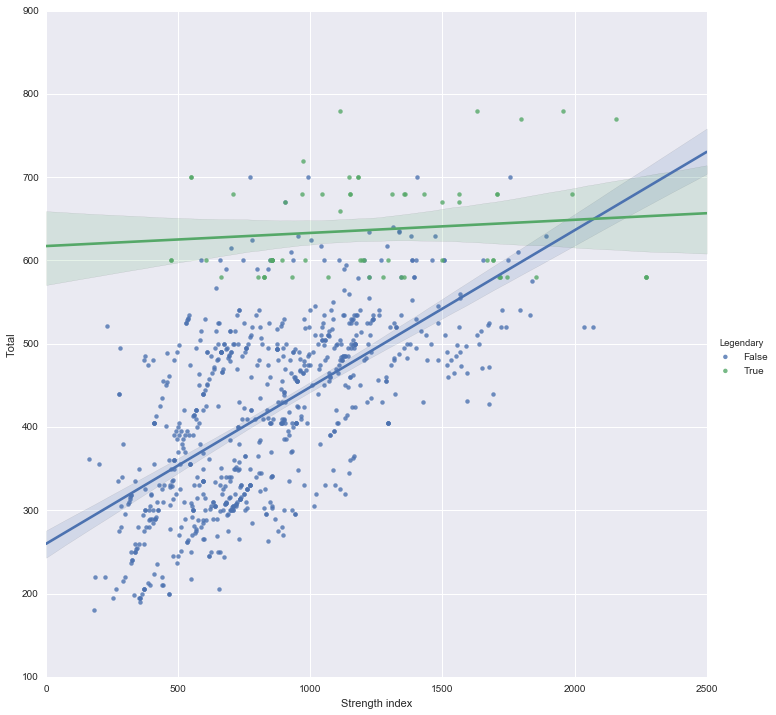

In [39]:
sns.lmplot(data=new_df,x='Strength index',y='Total',hue='Legendary', size=10)

Here we made a boxplot with the difference in strength between pokemon types for Type 1. You can see that some pokemon types are on average stronger than others.

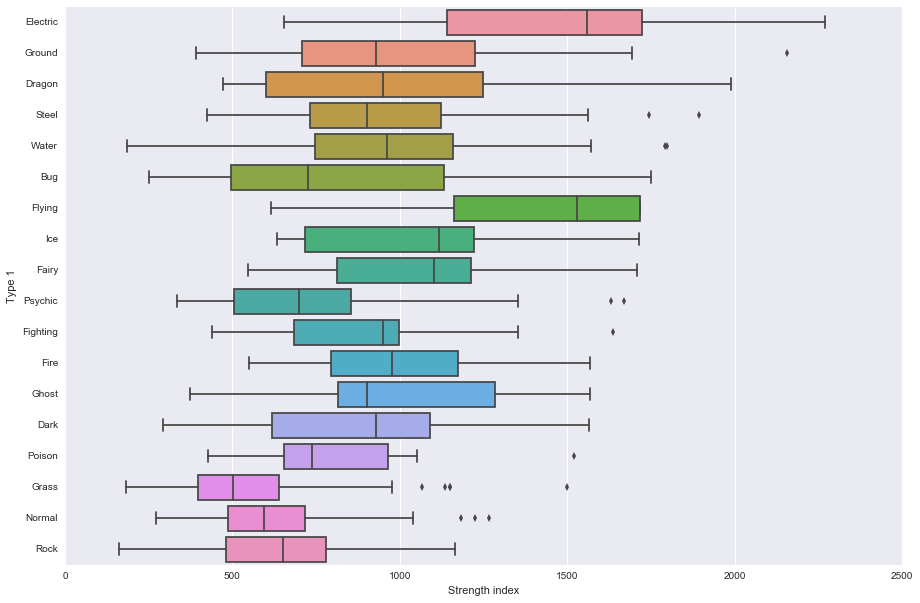

In [40]:
f, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=new_df, x='Strength index',y='Type 1',ax=ax)

The same was done for Type 2

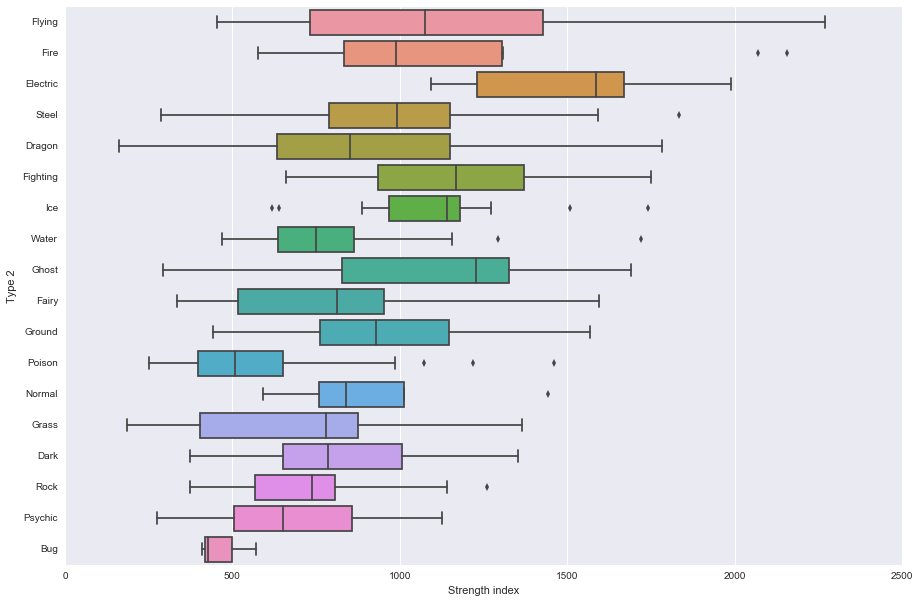

In [41]:
f, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=new_df, x='Strength index',y='Type 2',ax=ax)

Finally, we indexed the average strength for all pokemon type combinations, here you can see that a pokemon with the Ground/Fire combination for type on average has the highest strength score. The Rock/Dragon combination gives the lowest score.

In [42]:
grouped_df = new_df[['Type 1','Type 2','Strength index']].groupby(['Type 1','Type 2']).mean().sort_values(by='Strength index',ascending=False)
grouped_df = grouped_df.reset_index()
grouped_df = grouped_df.rename(columns={'Strength index':'Average strength index'})
grouped_df['Average strength index'] = np.around(grouped_df['Average strength index'],2)
grouped_df

,Type 1,Type 2,Average strength index
0,Ground,Fire,2156.00
1,Electric,Flying,2104.70
2,Electric,Fire,2069.60
3,Dragon,Electric,1989.00
4,Electric,Dragon,1784.25
5,Electric,Ice,1742.00
6,Electric,Water,1721.20
7,Electric,Ghost,1689.60
8,Psychic,Ghost,1668.00
9,Ground,Electric,1648.50
